In [26]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [27]:
#讀入mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
#檢視資料筆數
print(len(x_train),';',len(x_test))

60000 ; 10000


In [29]:
X = x_train[90]

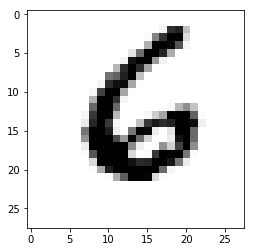

In [30]:
plt.imshow(X,cmap='Greys')

#格式整理

In [31]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

One-hot-encoding

In [32]:
from keras.utils import np_utils

In [33]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

類神經網路

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [35]:
NNm = Sequential()

In [36]:
NNm.add(Dense(600, input_dim=784))
NNm.add(Activation('sigmoid'))
NNm.add(Dense(60))
NNm.add(Activation('sigmoid'))
NNm.add(Dense(50))
NNm.add(Activation('sigmoid'))
#輸出層
NNm.add(Dense(10))
NNm.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [37]:
NNm.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [39]:
NNm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 600)               471000    
_________________________________________________________________
activation_1 (Activation)    (None, 600)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                36060     
_________________________________________________________________
activation_2 (Activation)    (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                3050      
_________________________________________________________________
activation_3 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
__________

In [40]:
NNm.fit(x_train, y_train, batch_size=60, epochs=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
60000/60000 [==============================] - 9s 157us/step - loss: 0.0914 - acc: 0.1693
Epoch 2/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.0885 - acc: 0.2828
Epoch 3/50
60000/60000 [==============================] - 9s 156us/step - loss: 0.0868 - acc: 0.2716 0s - loss: 0.086
Epoch 4/50
60000/60000 [==============================] - 8s 136us/step - loss: 0.0838 - acc: 0.2949
Epoch 5/50
60000/60000 [==============================] - 8s 140us/step - loss: 0.0801 - acc: 0.3574
Epoch 6/50
60000/60000 [==============================] - 9s 155us/step - loss: 0.0768 - acc: 0.4758
Epoch 7/50
60000/60000 [==============================] - 9s 149us/step - loss: 0.0734 - acc: 0.5565
Epoch 8/50
60000/60000 [==============================] - 8s 139us/step - loss: 0.0689 - acc: 0.6177
Epoch 9/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.0631 - acc: 0.6506
Epoch 10/50
60000/60000 [=

測試結果

In [41]:
from ipywidgets import interact_manual

In [43]:
predict = NNm.predict_classes(x_test)

In [44]:
def test(test_code):
    plt.imshow(x_test[test_code].reshape(28,28), cmap='Greys')
    print('The answer from NN is :', predict[test_code])

In [45]:
interact_manual(test, test_code=(0, 9999))

interactive(children=(IntSlider(value=4999, description='test_code', max=9999), Button(description='Run Intera…

<function __main__.test(test_code)>

測試結果

In [47]:
score = NNm.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 92us/step


In [49]:
print('loss: ', score[0])
print('Correct_rate is ', score[1])

loss:  0.008299491412937642
Correct_rate is  0.9469
